<h2 style="text-align: center;">
	<span style="font-size:36px;"><span style="font-family:times new roman,times,serif;"><strong>Video Game Recommendation System</strong></span></span></h2>


<h2 style="text-align: center;"><font face="times new roman, times, serif"><span style="font-size: 26px;">C964 - Brad Pappan</span></font></h2>


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import logging
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
!pip install python-Levenshtein
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from datetime import datetime
from random import randint

df = pd.read_csv("metacritic_critic_reviews.csv")
df.head()
df.info()

print(df.columns[df.isna().any()].tolist())
df.isnull().sum()
df.dropna(inplace=True)


def year_addition(date_whole):
    datetime_object = datetime.strptime(date_whole, '%b %d, %Y')
    return datetime_object.year


df['year'] = df['date'].apply(year_addition)


def game_year(row):
    calendar_year = str(row['year'])
    game_year_combined = str(row['game']) + " (" + calendar_year + ")"
    return game_year_combined


df['game'] = df.apply(game_year, axis=1)
df.head()

special_titles = df['game'].unique()
sum_of_score = {}
for i in special_titles:
    sum_of_score[i] = 0.0


def total_score(row):
    sum_of_score[row['game']] += float(row['score'])


df.apply(total_score, axis=1)
sum_df = pd.DataFrame.from_dict(sum_of_score, orient='index', columns=['score'])
sum_df = sum_df.reset_index().rename(columns={'index': 'game'}).sort_values('score', ascending=False)

sum_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125876 entries, 0 to 125875
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      125876 non-null  object 
 1   review    125876 non-null  object 
 2   game      125876 non-null  object 
 3   platform  125876 non-null  object 
 4   score     124311 non-null  float64
 5   date      125832 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.8+ MB
['score', 'date']


,game,score
3134,XCOM 2 (2016),13052.0
4999,Monster Hunter: World (2018),12808.0
4983,Red Dead Redemption 2 (2018),12683.0
4060,Destiny 2 (2017),12633.0
3119,Dark Souls III (2016),12431.0


<p style="text-align: center;"><span style="font-size:40px;"><strong>Descriptive Method</strong></span></p>
<p>My descriptive methods are shown below. They show average score by platform in a pie chart, count of reviews by platform in a line chart, and the game with the highest average score in a bar graph.&nbsp;</p>


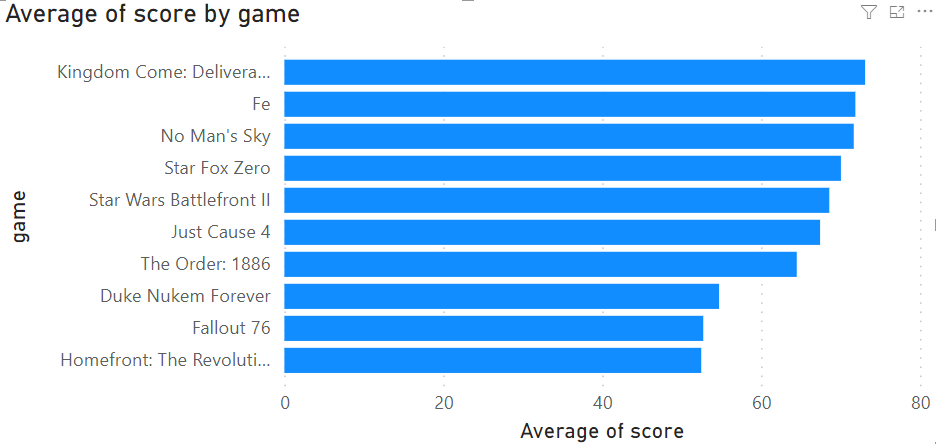

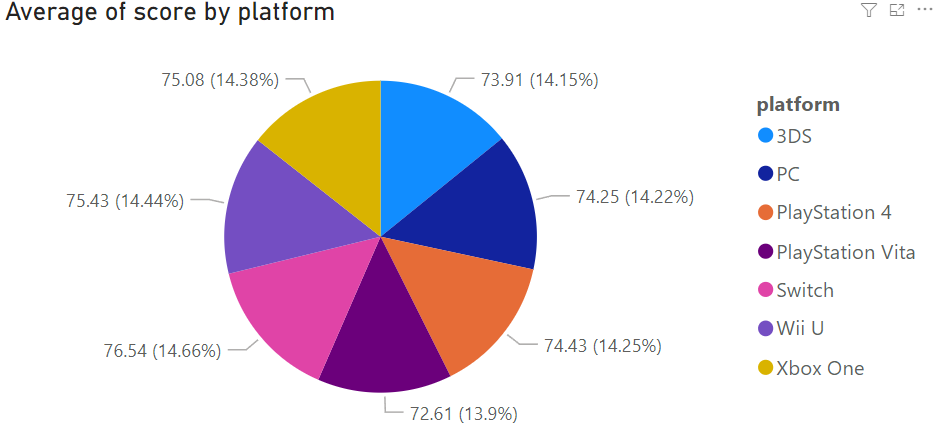

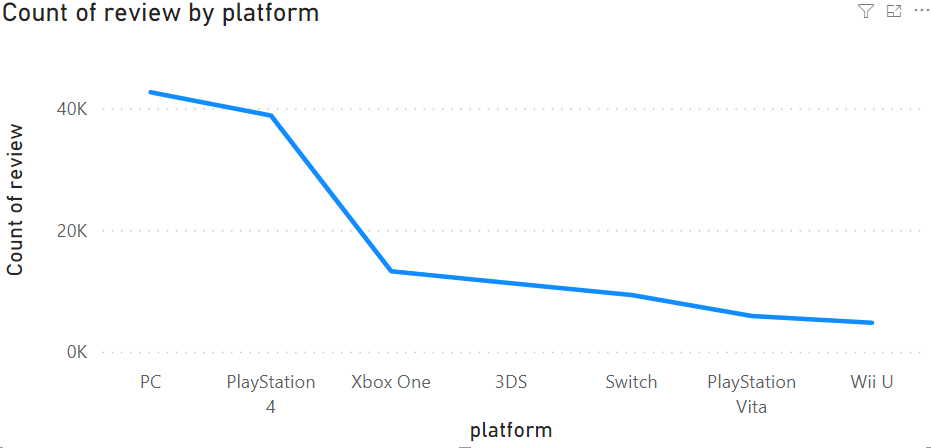

<p style="text-align: center;"><strong><span style="font-size:40px;">Non-Descriptive Method</span></strong></p>
<p>My non-descriptive method shows a trend downwards and forecasts that reviews in the future for games will be lower. This is done by taking the average score for every year out of the dataset, and plotting this in a linear regression chart according to the year the review was made. This average is clearly trending downwards and can show a possible average score of 75 for 2020 and lowering past that.</p>



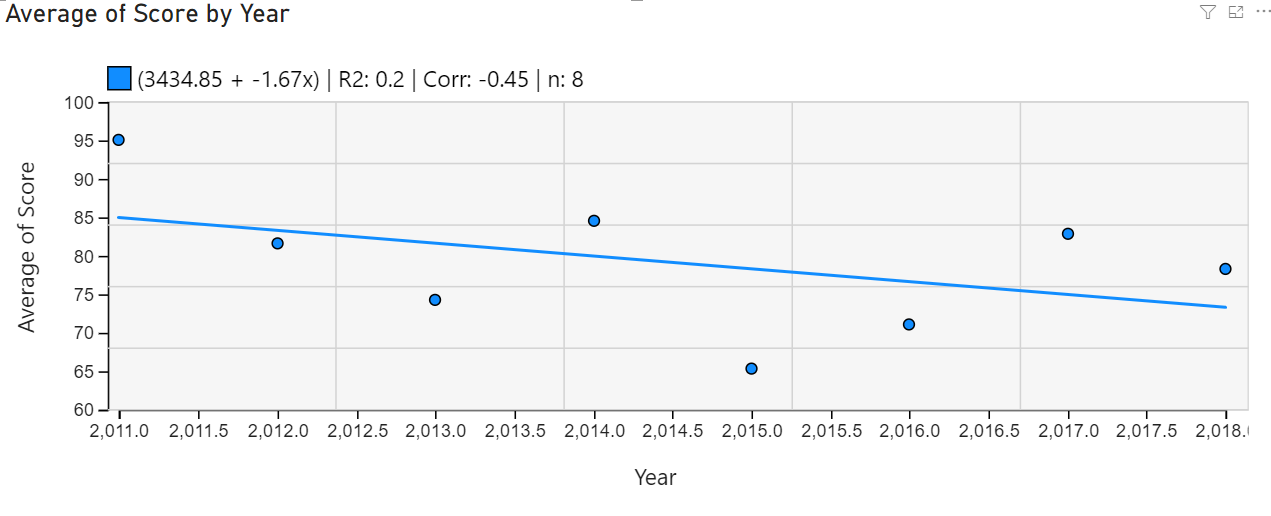

<p><span style="font-size:14px;">Below is the algorithm for the code. You will also find the <strong>product health monitorin</strong>g via the logging from the user interaction. The execption writes to a log file titled &quot;log&quot;</span></p>


In [ ]:
top_100titles_sum = sum_df.iloc[:100]
top_100titles_sum['game'].unique()

random = randint(0, int(top_100titles_sum.shape[0]) - 1)

game_name = top_100titles_sum['game'].iloc[random]

review_current = df.loc[
    df['game'] == game_name]

selected_game_indexes = review_current.index

random = randint(0, int(selected_game_indexes.shape[0]) - 1)

selected_review_index = selected_game_indexes[random]
selected_review_index

user_feedback = {'game': [],
                 'name': [],
                 'score': []}


def display_ui():
    try:
        count = 0

        inputs = []
        print(
            "Based on each review quote, please respond with what you think is appropriate score from the list below ")
        print("Here is the scoring list to respond with:")
        print("""
      2 - The game is WAY better /n 
      1 - The game is somewhat better /n 
      0 - The game review is equivalent to what I think /n 
      -1 - The game is somewhat worse  /n
      -2 - The game is WAY worse /n
      N - No comment
       """)
        while count < 10:

            random_top_100 = randint(0, int(top_100titles_sum.shape[0]) - 1)
            while top_100titles_sum['game'].iloc[random_top_100] in inputs:
                random_top_100 = randint(0, int(top_100titles_sum.shape[0]) - 1)
            current_game = top_100titles_sum['game'].iloc[random_top_100]
            review_current = df.loc[df['game'] == current_game]

            selected_game_indexes = review_current.index
            random = randint(0, int(selected_game_indexes.shape[0]) - 1)
            current_loc = selected_game_indexes[random]

            print("Do you agree with review listed below? Rate how you feel about it -2 to +2")
            print(df['game'].iloc[current_loc])
            print(df['review'].iloc[current_loc])

            input_from_user = input()
            input_from_users = ["The game is WAY better", "The game is somewhat better",
                                "The game review is equivalent to what I think", "No comment", "The game is somewhat "
                                                                                               "worse",
                                "The game is WAY worse"]
            user_increments = [20, 10, 0, 'NaN', -20, -30]
            inputs.append(top_100titles_sum['game'].iloc[random_top_100])

            if input_from_user == "1":
                user_score = int(df['score'].iloc[current_loc]) + 10
                if user_score > 100:
                    user_score == 100
                user_feedback['game'].append(df['game'].iloc[current_loc])
                user_feedback['name'].append(1001)
                user_feedback['score'].append(user_score)
                count += 1
            elif input_from_user == "2":
                user_score = int(df['score'].iloc[current_loc]) + 20
                if user_score > 100:
                    user_score == 100
                user_feedback['game'].append(df['game'].iloc[current_loc])
                user_feedback['name'].append(1001)
                user_feedback['score'].append(user_score)
                count += 1
            elif input_from_user == "0":
                user_score = int(df['score'].iloc[current_loc])
                user_feedback['game'].append(df['game'].iloc[current_loc])
                user_feedback['name'].append(1001)
                user_feedback['score'].append(user_score)
                count += 1
            elif input_from_user == "-1":
                user_score = int(df['score'].iloc[current_loc]) - 20
                if user_score < 20:
                    user_score == 20
                user_feedback['game'].append(df['game'].iloc[current_loc])
                user_feedback['name'].append(1001)
                user_feedback['score'].append(user_score)
                count += 1
            elif input_from_user == "-2":
                user_score = int(df['score'].iloc[current_loc]) - 30
                if user_score < 20:
                    user_score == 20
                user_feedback['game'].append(df['game'].iloc[current_loc])
                user_feedback['name'].append(1001)
                user_feedback['score'].append(user_score)
                count += 1

            elif input_from_user == "N":
                continue
            elif input_from_user == "End":
                break
            else:
                continue
    except Exception as Argument:
        f = open("log.txt", "a")
        f.write(str(Argument))
        f.close()


display_ui()
my_ratings = pd.DataFrame(user_feedback)
my_ratings

main_df = df[['game', 'name', 'score']]


def create_profile(current_df, profile_df):
    complete_df = pd.concat([current_df, profile_df], axis=0)
    complete_df.columns = ['itemID', 'userID', 'rating']
    complete_df['reviews'] = complete_df.groupby(['itemID'])['rating'].transform('count')
    return complete_df


updated_df = create_profile(main_df, my_ratings)


def pivot_data_similarity(full_df):
    pivot = full_df.pivot_table(index=['itemID'], columns=['userID'], values='rating')
    pivot_n = pivot.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)), axis=1)

    pivot_n.fillna(0, inplace=True)
    pivot_n = pivot_n.T
    pivot_n = pivot_n.loc[:, (pivot_n != 0).any(axis=0)]
    piv_sparse = sp.sparse.csr_matrix(pivot_n.values)

    game_similarity = cosine_similarity(piv_sparse)
    sim_matrix_df = pd.DataFrame(game_similarity, index=pivot_n.index, columns=pivot_n.index)

    return sim_matrix_df


new_sim_df = pivot_data_similarity(updated_df)

similar_reviews = []


def game_recommendation(review_name):
    top_5_most_similar = []
    number = 1
    print('Recommended critics based on how similar your tastes are:')
    for n in new_sim_df.sort_values(by=review_name, ascending=False).index[1:6]:
        top_5_most_similar.append(n)
        print("#" + str(number) + ": " + n + ", " + str(round(new_sim_df[review_name][n] * 100, 2)) + "% " + "match")
        number += 1
    return top_5_most_similar


similar_reviews = game_recommendation(1001)

reviewing_name = df[df['name'] == similar_reviews[0]].sort_values('score', ascending=False)


def top_reviewer(reviewer):
    reviewer_num = 1
    print("These are your most similar critic\'s ({}) highest scored games:\n".format(reviewer))
    for n in range(len(reviewing_name['game'][:10])):
        print(
            "#" + str(reviewer_num) + ": " + str(reviewing_name.iloc[n]['game']) + ", " + str(reviewing_name.iloc[n]['score']))
        reviewer_num += 1


top_reviewer(reviewing_name.iloc[0]['name'])


def recommend_games_from_reviews():
    user_feeback = {'game': [], 'name': [], 'score': []}
    display_ui()
    profile_df = pd.DataFrame(user_feeback)

    full_df = create_profile(main_df, profile_df)
    new_sim_df = pivot_data_similarity(full_df)
    similar_reviews = []
    similar_reviews = game_recommendation(1001)
    reviewing_name = df[df['name'] == similar_reviews[0]].sort_values('score', ascending=False)
    top_reviewer(reviewing_name.iloc[0]['name'])


recommend_games_from_reviews()

Based on each review quote, please respond with what you think is appropriate score from the list below 
Here is the scoring list to respond with:

      2 - The game is WAY better /n 
      1 - The game is somewhat better /n 
      0 - The game review is equivalent to what I think /n 
      -1 - The game is somewhat worse  /n
      -2 - The game is WAY worse /n
      N - No comment
       
Do you agree with review listed below? Rate how you feel about it -2 to +2
World of Final Fantasy (2016)
World of Final Fantasy is a really entertaining and charming JRPG. It merges many of the most memorable elements from most of the games from the Final Fantasy series and combines them in an original title with accessible and easy to learn controls, easygoing story and creative gameplay mechanics. It doesn’t matter if you novice gamer or a hardcore fan, the game has many things that will engage you and make you enjoy it.
